In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100

df = pd.read_table('MatchTimelinesFirst15.csv', sep = ',')

In [2]:
df

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,48646,3.475682e+09,0,27013.0,338.0,61.0,9.0,31853.0,331.0,77.0,9.6,14.0,2.0,0.0,2.0,21.0,0.0,0.0,0.0
48647,48647,3.500988e+09,1,25376.0,350.0,91.0,9.0,23786.0,354.0,87.0,9.4,7.0,2.0,0.0,0.0,5.0,1.0,0.0,1.0
48648,48648,3.496593e+09,0,25456.0,308.0,92.0,9.0,29569.0,344.0,96.0,9.6,8.0,0.0,0.0,2.0,17.0,3.0,0.0,1.0
48649,48649,3.491706e+09,1,27033.0,335.0,85.0,9.4,25666.0,316.0,64.0,8.8,14.0,2.0,0.0,0.0,12.0,0.0,0.0,0.0


In [3]:
df.describe()

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
count,48651.00000,4.865100e+04,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.0,48651.000000,48651.000000,48651.000000,48651.0,48651.000000
mean,24325.00000,3.486083e+09,0.505416,26349.160572,335.859140,83.136585,9.172251,26203.028591,336.693984,84.692997,9.174759,11.013155,1.316355,0.0,0.794084,10.747693,1.287188,0.0,0.891657
std,14044.47831,2.812307e+07,0.499976,2777.299868,32.673096,14.794947,0.413735,2754.709425,33.278962,14.902326,0.421396,4.532898,0.956784,0.0,1.054556,4.453358,0.952450,0.0,1.111205
min,0.00000,2.544365e+09,0.000000,15930.000000,120.000000,0.000000,5.400000,11133.000000,14.000000,1.000000,2.400000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,12162.50000,3.475554e+09,0.000000,24401.500000,315.000000,73.000000,9.000000,24301.000000,316.000000,75.000000,9.000000,8.000000,1.000000,0.0,0.000000,8.000000,1.000000,0.0,0.000000
50%,24325.00000,3.494380e+09,1.000000,26167.000000,337.000000,83.000000,9.200000,26029.000000,338.000000,84.000000,9.200000,11.000000,1.000000,0.0,1.000000,10.000000,1.000000,0.0,1.000000
75%,36487.50000,3.506802e+09,1.000000,28126.000000,358.000000,92.000000,9.400000,27940.000000,359.000000,94.000000,9.400000,14.000000,2.000000,0.0,1.000000,14.000000,2.000000,0.0,1.000000
max,48650.00000,3.513125e+09,1.000000,39769.000000,455.000000,164.000000,10.800000,39999.000000,457.000000,160.000000,10.600000,50.000000,4.000000,0.0,11.000000,43.000000,4.000000,0.0,10.000000


In [4]:
df = df.drop([df.columns[0],'matchId','blueDragonKills','redDragonKills'], axis = 1)

In [5]:
df

,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueTowersDestroyed,redChampKills,redHeraldKills,redTowersDestroyed
0,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,1.0,12.0,2.0,1.0
1,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,19.0,2.0,0.0
2,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,11.0,0.0,4.0
3,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,3.0,16.0,3.0,0.0
4,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,8.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,0,27013.0,338.0,61.0,9.0,31853.0,331.0,77.0,9.6,14.0,2.0,2.0,21.0,0.0,0.0
48647,1,25376.0,350.0,91.0,9.0,23786.0,354.0,87.0,9.4,7.0,2.0,0.0,5.0,1.0,1.0
48648,0,25456.0,308.0,92.0,9.0,29569.0,344.0,96.0,9.6,8.0,0.0,2.0,17.0,3.0,1.0
48649,1,27033.0,335.0,85.0,9.4,25666.0,316.0,64.0,8.8,14.0,2.0,0.0,12.0,0.0,0.0


In [6]:
cols_to_scale = ['blueGold','blueMinionsKilled','blueJungleMinionsKilled','blueAvgLevel','redGold','redMinionsKilled','redJungleMinionsKilled','redAvgLevel','blueChampKills','blueHeraldKills','blueTowersDestroyed','redChampKills','redHeraldKills','redTowersDestroyed']

scaler = p.StandardScaler().fit(df[cols_to_scale])

df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [7]:
df

,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueTowersDestroyed,redChampKills,redHeraldKills,redTowersDestroyed
0,0,-0.638814,0.402196,0.396316,-1.383150,-0.125978,0.279639,-0.314920,0.059899,-1.105961,-0.330648,0.195265,0.281208,0.748405,0.097502
1,0,0.309959,-1.403589,-3.186025,-0.416337,0.930043,-1.282925,0.490331,0.534517,1.982603,-1.375826,-0.753011,1.853072,0.748405,-0.802431
2,1,2.051956,0.310377,0.599090,0.550476,-0.326001,-1.312975,-0.046503,0.534517,1.320768,1.759709,-0.753011,0.056656,-1.351463,2.797300
3,0,-2.192137,-3.454227,-1.563833,-2.349962,1.534105,0.580133,1.496896,0.534517,-0.885349,-1.375826,2.091816,1.179416,1.798340,-0.802431
4,1,1.392676,1.228573,1.815734,1.517288,-0.840035,-0.080952,-1.657007,-0.889336,1.100156,1.759709,-0.753011,-0.617000,-1.351463,0.997434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,0,0.239026,0.065524,-1.496241,-0.416337,2.051044,-0.171100,-0.516233,1.009135,0.658933,0.714531,1.143541,2.302176,-1.351463,-0.802431
48647,1,-0.350402,0.432803,0.531499,-0.416337,-0.877426,0.520034,0.154810,0.534517,-0.885349,0.714531,-0.753011,-1.290656,-0.301529,0.097502
48648,0,-0.321596,-0.852672,0.599090,-0.416337,1.221910,0.219541,0.758749,1.009135,-0.664737,-1.375826,1.143541,1.403968,1.798340,0.097502
48649,1,0.246227,-0.026295,0.125951,0.550476,-0.194951,-0.621840,-1.388589,-0.889336,0.658933,0.714531,-0.753011,0.281208,-1.351463,-0.802431


In [8]:
X = df[['blueGold','blueMinionsKilled','blueJungleMinionsKilled','blueAvgLevel','redGold','redMinionsKilled','redJungleMinionsKilled','redAvgLevel','blueChampKills','blueHeraldKills','blueTowersDestroyed','redChampKills','redHeraldKills','redTowersDestroyed']]
y = df[['blue_win']]

In [9]:
#1. Random Forest

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [67]:
y_pred = model.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [69]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7858390710101737
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      4742
           1       0.80      0.78      0.79      4989

    accuracy                           0.79      9731
   macro avg       0.79      0.79      0.79      9731
weighted avg       0.79      0.79      0.79      9731



In [15]:
#2. SVM:

In [34]:
def clasification(X,y, kernel, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= train_size, random_state=42)
    model = SVC(kernel = kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [35]:
results = []
kernels = ['linear', 'poly', 'rbf']
train_set_sizes = [0.2, 0.4, 0.6, 0.8]
for kernel in kernels:
    small_list = []
    for size in train_set_sizes:
        small_list.append(clasification(X,y, kernel, size))
        print(small_list[-1])
    results.append(small_list)

C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7857197913722669


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7859956836011099


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7888083860027748


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7932381050251772


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7818658307854371


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7818163132472338


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7857766815682647


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7919021683280238


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7843837517021659


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7852077695180021


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7871126869122861


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7911828177987874


In [37]:
def clasification(X,y, c_value):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42) #zmienić random_state
    model = SVC(kernel = "linear", C = c_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [38]:
results = []
c_values = [0.001, 0.1, 1]
for c in c_values:
    results.append(clasification(X, y, c))
    print(results[-1])

C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7922104614119824


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7934436337478162


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7932381050251772


In [39]:
def clasification(X,y, c_value, n_degree):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42) #zmienić random_state
    model = SVC(kernel = "poly", degree=n_degree, C=c_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [42]:
results = []
n_degree = [1,2,3,4,5]
c_values = [0.1]
for degree in n_degree:
    small_list = []
    for c_value in c_values:
        small_list.append(clasification(X,y, c_value, degree))
        print(small_list[-1])
    results.append(small_list)

C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7939574555544138


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6380639194327408


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7908745247148289


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6545062172438598


C:\Users\Gracjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7851197204809373


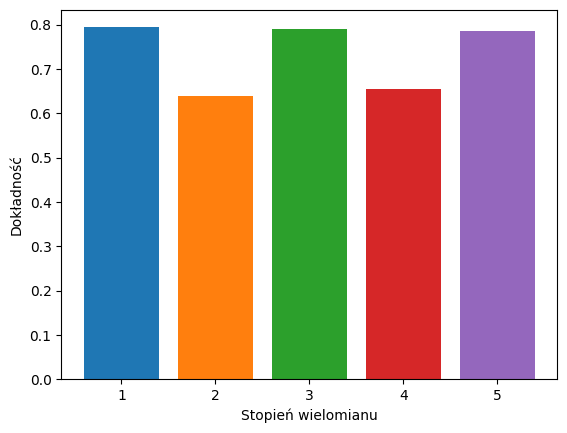

In [50]:
for i in range(len(n_degree)):
    plt.bar(n_degree[i], results[i], label=f'Stopień {n_degree[i]}')
    
plt.xlabel("Stopień wielomianu")
plt.ylabel("Dokładność")
plt.show()

In [24]:
#3. Sztuczna sień neuronowa:

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

In [26]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)


In [27]:
model = Sequential()
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [28]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [29]:
EPOCHS = 15

In [30]:
history=  model.fit(x_train, y_train, epochs = EPOCHS, validation_data = (x_test, y_test))

Epoch 1/15


1217/1217 [==============================] - 3s 2ms/step - loss: 0.4703 - accuracy: 0.7659 - val_loss: 0.4467 - val_accuracy: 0.7853
Epoch 2/15
1217/1217 [==============================] - 2s 2ms/step - loss: 0.4437 - accuracy: 0.7852 - val_loss: 0.4455 - val_accuracy: 0.7867
Epoch 3/15
1217/1217 [==============================] - 2s 2ms/step - loss: 0.4428 - accuracy: 0.7865 - val_loss: 0.4453 - val_accuracy: 0.7869
Epoch 4/15
1217/1217 [==============================] - 2s 2ms/step - loss: 0.4421 - accuracy: 0.7866 - val_loss: 0.4445 - val_accuracy: 0.7875
Epoch 5/15
1217/1217 [==============================] - 2s 2ms/step - loss: 0.4417 - accuracy: 0.7876 - val_loss: 0.4446 - val_accuracy: 0.7861
Epoch 6/15
1217/1217 [==============================] - 2s 2ms/step - loss: 0.4412 - accuracy: 0.7878 - val_loss: 0.4444 - val_accuracy: 0.7880
Epoch 7/15
1217/1217 [==============================] - 2s 2ms/step - loss: 0.4408 - accuracy: 0.7871 - val_loss: 0.4456 - val_accurac

In [31]:
#history=  model.fit(x_train, y_train, epochs = EPOCHS, validation_data = (x_test, y_test) , callbacks = [es])

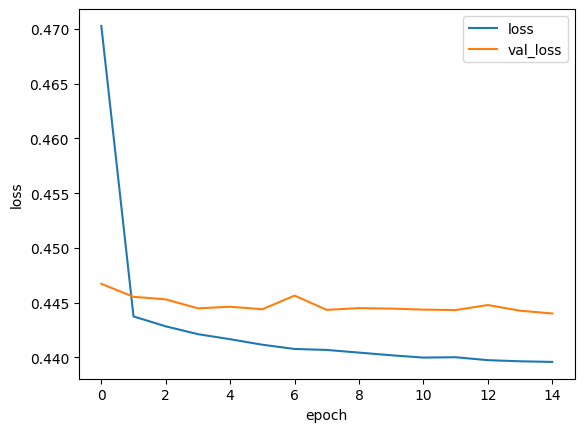

In [32]:
hist = pd.DataFrame(history.history)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()